## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import numpy as np

In [0]:
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [35]:
print('number of samples in train set {}'.format(x_train.shape[0]))

number of samples in train set 60000


In [36]:
print('number of samples in test set {}'.format(x_test.shape[0]))

number of samples in test set 10000


### Find dimensions of an image in the dataset

In [37]:
print('dimension of an image {}'.format(x_train[0].shape))

dimension of an image (28, 28)


In [0]:
x_test = x_test.astype('int32')
x_train = x_train.astype('int32')
y_test = y_test.astype('int32')
y_train = y_train.astype('int32')

In [39]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(10000, 28, 28)
(60000, 28, 28)
(10000,)
(60000,)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = to_categorical(y_train, num_classes=10)

In [0]:
y_test = to_categorical(y_test, num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_test = x_test/255

In [0]:
x_train = x_train/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [48]:
x_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [55]:
model1 = Sequential()
model1.add(Convolution2D(32,3,3,input_shape=(28,28,1)))
model1.add(Activation('relu'))
model1.add(Convolution2D(32,3,3))
model1.add(Activation('relu'))
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]
model1.fit(x_train, y_train, batch_size=32, nb_epoch=10,validation_data=(x_test, y_test), callbacks=callback_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  





Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 19s 312us/step - loss: 0.3812 - acc: 0.8610 - val_loss: 0.3231 - val_acc: 0.8812
Epoch 2/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.2359 - acc: 0.9123 - val_loss: 0.2645 - val_acc: 0.9024
Epoch 3/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.1676 - acc: 0.9379 - val_loss: 0.2470 - val_acc: 0.9136
Epoch 4/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.1168 - acc: 0.9577 - val_loss: 0.2798 - val_acc: 0.9096
Epoch 5/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0785 - acc: 0.9705 - val_loss: 0.3130 - val_acc: 0.9125
Epoch 6/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0502 - acc: 0.9821 - val_loss: 0.3665 - val_acc: 0.9138
Epoch 7/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0386 - acc: 0.9861 - val_

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [57]:
model2 = Sequential()
model2.add(Convolution2D(32,3,3,input_shape=(28,28,1)))
model2.add(Activation('relu'))
model2.add(Convolution2D(32,3,3))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]
model2.fit(x_train, y_train, batch_size=32, nb_epoch=10,validation_data=(x_test, y_test), callbacks=callback_list)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.3925 - acc: 0.8576 - val_loss: 0.3056 - val_acc: 0.8903
Epoch 2/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.2601 - acc: 0.9047 - val_loss: 0.2872 - val_acc: 0.8908
Epoch 3/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.2113 - acc: 0.9211 - val_loss: 0.2397 - val_acc: 0.9102
Epoch 4/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.1774 - acc: 0.9340 - val_loss: 0.2244 - val_acc: 0.9187
Epoch 5/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1501 - acc: 0.9448 - val_loss: 0.2332 - val_acc: 0.9199
Epoch 6/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1291 - acc: 0.9509 - val_loss: 0.2335 - val_acc: 0.9236
Epoch 7/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.1094 - acc: 0.9586 - val_loss: 0.2428 - 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

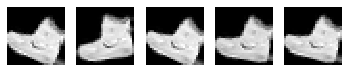

In [61]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [62]:
model2.fit_generator(datagen.flow(x_train, y_train,batch_size=32),samples_per_epoch=x_train.shape[0],nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
  12/1875 [..............................] - ETA: 23s - loss: 2.2546 - acc: 0.5365

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  


1875/1875 [==============================] - 20s 11ms/step - loss: 0.5009 - acc: 0.8205 - val_loss: 0.2805 - val_acc: 0.9070
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3687 - acc: 0.8666 - val_loss: 0.2762 - val_acc: 0.9120
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3336 - acc: 0.8760 - val_loss: 0.2751 - val_acc: 0.9082
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3088 - acc: 0.8856 - val_loss: 0.2788 - val_acc: 0.9049
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2942 - acc: 0.8923 - val_loss: 0.3101 - val_acc: 0.8941
Epoch 6/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2822 - acc: 0.8967 - val_loss: 0.2682 - val_acc: 0.9091
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2728 - acc: 0.8992 - val_loss: 0.2727 - val_acc: 0.9125
Epoch 8/10
1875/1875 [==============================] - 19s

###  Report the final train and validation accuracy

In [63]:
loss_and_metrics = model2.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 59us/step
[0.2760670597046614, 0.9081]


In [64]:
loss_and_metrics = model2.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 3s 56us/step
[0.15309266046981015, 0.9421]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [79]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [80]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
datagen.fit(x=x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

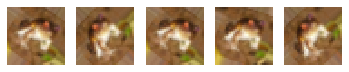

In [88]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype(np.uint8))
    plt.plot()
plt.show()